In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [17]:
df_raw=customers.copy()

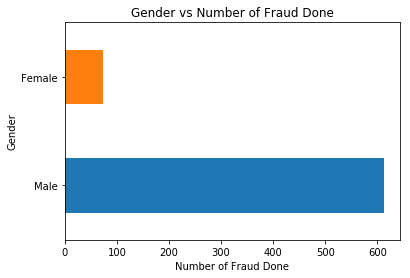

Percentage of Female Fraud Done from Female Insurance Policy Holder 4.06 %
Percentage of Male Fraud Done from Male Insurance Policy Holder 6.27 %


In [13]:
plt.title('Gender vs Number of Fraud Done')
plt.xlabel('Number of Fraud Done')
plt.ylabel('Gender')
customers[customers['FraudFound_P']==1]['Sex'].value_counts().plot('barh')
plt.show()
print('Percentage of Female Fraud Done from Female Insurance Policy Holder',format((73/1797)*100,'.2f'),'%')
print('Percentage of Male Fraud Done from Male Insurance Policy Holder',format((612/9767)*100,'.2f'),'%')

In [4]:
test=pd.read_csv('output_round1.csv')

In [5]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [6]:
def married(status):
    if status=='Married':
        return 1
    else:
        return 0
def single(status):
    if status=='Single':
        return 1
    else:
        return 0
def divorced(status):
    if status=='Divorced':
        return 1
    else:
        return 0
def widow(status):
    if status=='Widow':
        return 1
    else:
        return 0
customers['Married']=customers['MaritalStatus'].apply(married)
customers['Single']=customers['MaritalStatus'].apply(single)
customers['Divorced']=customers['MaritalStatus'].apply(divorced)
customers['Widow']=customers['MaritalStatus'].apply(widow)
del customers['MaritalStatus']

In [7]:
def collision(base):
    if base=='Collision':
        return 1
    else:
        return 0
def liability(base):
    if base=='Liability':
        return 1
    else:
        return 0
def perils(base):
    if base=='All Perils':
        return 1
    else:
        return 0    
customers['Collision']=customers['BasePolicy'].apply(collision)
customers['Liability']=customers['BasePolicy'].apply(liability)
customers['All Perils']=customers['BasePolicy'].apply(perils)
del customers['BasePolicy']

In [8]:
def convertStr(boolean):
    if boolean=='No':
        return 0
    elif boolean=='Yes':
        return 1
customers['PoliceReportFiled']=customers['PoliceReportFiled'].apply(convertStr)  
customers['WitnessPresent']=customers['WitnessPresent'].apply(convertStr) 

In [9]:
def convertAgent(agent):
    if agent=='External':
        return 1
    elif agent=='Internal':
        return 2
customers['AgentType']=customers['AgentType'].apply(convertAgent) 

In [10]:
def convertCar(car):
    if car=='1 vehicle':
        return 1
    elif car=='2 vehicles':
        return 2
    elif car=='3 to 4':
        return 3
    elif car=='5 to 8':
        return 4
    elif car=='more than 8':
        return 5
customers['NumberOfCars']=customers['NumberOfCars'].apply(convertCar) 

In [11]:
def convertAddressChange(address):
    if address=='no change':
        return 0
    elif address=='under 6 months':
        return 1
    elif address=='1 year':
        return 2
    elif address=='2 to 3 years':
        return 3
    elif address=='4 to 8 years':
        return 4
customers['AddressChange_Claim']=customers['AddressChange_Claim'].apply(convertAddressChange)   

In [12]:
def convertSuppliments(suppliment):
    if suppliment=='none':
        return 0
    elif suppliment=='1 to 2':
        return 1
    elif suppliment=='3 to 5':
        return 2
    elif suppliment=='more than 5':
        return 3
customers['NumberOfSuppliments']=customers['NumberOfSuppliments'].apply(convertSuppliments)     

In [13]:
def convertClaims(claim):
    if claim=='none':
        return 0
    elif claim==1:
        return 1
    elif claim=='2 to 4':
        return 2
    elif claim=='more than 4':
        return 3
customers['PastNumberOfClaims']=customers['PastNumberOfClaims'].apply(convertClaims)      

In [14]:
def convertDaysPolicy(number):
    if number=='none':
        return 0
    elif number=='1 to 7':
        return 1
    elif number=='8 to 15':
        return 2
    elif number=='15 to 30':
        return 3
    elif number=='more than 30':
        return 4
customers['Days_Policy_Accident']=customers['Days_Policy_Accident'].apply(convertDaysPolicy)   
customers['Days_Policy_Claim']=customers['Days_Policy_Claim'].apply(convertDaysPolicy) 

In [15]:
def convertFault(fault):
    if fault=='Policy Holder':
        return 0
    elif fault=='Third Party':
        return 1
customers['Fault']=customers['Fault'].apply(convertFault)  

In [16]:
customers.dropna(inplace=True)
customers.drop(customers.index[[1146]],inplace=True)
X=customers[customers['DriverRating'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)
X=customers[customers['Age'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)

In [17]:
def sport(category):
    if category=='Sport':
        return 1
    else:
        return 0
def sedan(category):
    if category=='Sedan':
        return 1
    else:
        return 0
def utility(category):
    if category=='Utility':
        return 1
    else:
        return 0
customers['Sport']=customers['VehicleCategory'].apply(sport)
customers['Sedan']=customers['VehicleCategory'].apply(sedan)
customers['Utility']=customers['VehicleCategory'].apply(utility)
del customers['VehicleCategory']  

In [18]:
def convertAgeHolder(age):
    if age=='16 to 17':
        return 1
    elif age=='18 to 20':
        return 2
    elif age=='21 to 25':
        return 3
    elif age=='26 to 30':
        return 4
    elif age=='31 to 35':
        return 5
    elif age=='36 to 40':
        return 6
    elif age=='41 to 50':
        return 7
    elif age=='51 to 65':
        return 8
    elif age=='over 65':
        return 9
customers['AgeOfPolicyHolder']=customers['AgeOfPolicyHolder'].apply(convertAgeHolder)  

In [4]:
def convertAgeVehicle(age):
    if age=='new':
        return 1
    elif age=='2 years':
        return 2
    elif age=='3 years':
        return 3
    elif age=='4 years':
        return 4
    elif age=='5 years':
        return 5
    elif age=='6 years':
        return 6
    elif age=='7 years':
        return 7
    elif age=='more than 7':
        return 8
customers['AgeOfVehicle']=customers['AgeOfVehicle'].apply(convertAgeVehicle)  

In [20]:
def convertPrice(price):
    if price=='less than 20000':
        return 0
    elif price=='20000 to 29000':
        return 1
    elif price=='30000 to 39000':
        return 2
    elif price=='40000 to 59000':
        return 3
    elif price=='60000 to 69000':
        return 4
    elif price=='more than 69000':
        return 5
customers['VehiclePrice']=customers['VehiclePrice'].apply(convertPrice)  

In [21]:
def convertMonth(month):
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
customers['Month']=customers['Month'].apply(convertMonth)
customers['MonthClaimed']=customers['MonthClaimed'].apply(convertMonth)  

In [22]:
def convertDay(day):
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7
customers['DayOfWeek']=customers['DayOfWeek'].apply(convertDay)
customers['DayOfWeekClaimed']=customers['DayOfWeekClaimed'].apply(convertDay)   

In [23]:
def convertSex(sex):
    if sex=='Male':
        return 0
    elif sex=='Female':
        return 1
customers['Sex']=customers['Sex'].apply(convertSex)  

In [24]:
def convertArea(area):
    if area=='Urban':
        return 0
    elif area=='Rural':
        return 1
customers['AccidentArea']=customers['AccidentArea'].apply(convertArea)   

In [11]:
def createMake(carMake):
    if carMake=='Jaguar' or carMake=='Lexus' or carMake=='Mecedes' or carMake=='BMW' or carMake=='Porche' or carMake=='Ferrari':
        return 1
    else:
        return 0
customers['Make']=customers['Make'].apply(createMake)

In [26]:
customers['FraudFound_P'].value_counts()

0    10868
1      685
Name: FraudFound_P, dtype: int64

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [ ]:
display_all(customers.head())

In [ ]:
customers.columns

# Detected Fraud

In [27]:
fraud_count_dict = {}
for rep_number in np.unique(customers['RepNumber']):
    fraud_count_dict[rep_number] = customers[customers['RepNumber']==rep_number]['FraudFound_P'].value_counts()[1]
fraud_count = []
for index, row in customers.iterrows():
    fraud_count.append(fraud_count_dict[row['RepNumber']])
customers['Fraud_Count'] = fraud_count    

In [28]:
del customers['PolicyNumber']
del customers['Year']

del customers['PolicyType']

In [29]:
Fraud=customers[customers['FraudFound_P']==1]
NotFraud=customers[customers['FraudFound_P']==0]
Y_fraud=Fraud['FraudFound_P'].values
Y_NotFraud=NotFraud['FraudFound_P'].values
del Fraud['FraudFound_P']
del NotFraud["FraudFound_P"]
del customers['FraudFound_P']

In [ ]:
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(Fraud.values,Y_fraud,test_size=0.5)
X_train_Notfraud,X_test_Notfraud,Y_train_Notfraud,Y_test_Notfraud=train_test_split(NotFraud.values,Y_NotFraud,test_size=0.80)

In [ ]:
X_train=np.concatenate([X_train_fraud,X_train_Notfraud])
Y_train=np.concatenate([Y_train_fraud,Y_train_Notfraud])
X_test=np.concatenate([X_test_fraud,X_test_Notfraud])
Y_test=np.concatenate([Y_test_fraud,Y_test_Notfraud])

In [ ]:
df_new=pd.DataFrame(X_train)
df_new.columns=customers.columns
df_new['FraudFound_P']=Y_train
df_new = df_new.sample(frac=1).reset_index(drop=True)
Y_train=df_new['FraudFound_P'].values
del df_new['FraudFound_P']
X_train=df_new.values

In [ ]:
### Use Your Algo
### Analysing the Public Holiday in Australia
## 1 January,26 January,2nd Monday in February,1st Monday in March,2nd Monday in March
## 25 April,1st Monday in May,1st Monday after or on 27 May,1st Monday in June,2nd Monday in June
## 1st Monday in October,25 December,26 December,31 December


In [ ]:
## Analysing the 1 January
claimed=customers[(customers['MonthClaimed']==1.0) & (customers['WeekOfMonthClaimed']==1)]
TotalClaim=claimed.shape[0]
FraudClaimed=claimed[claimed['FraudFound_P']==1].shape[0]
NotFraudClaimed=claimed[claimed['FraudFound_P']==0].shape[0]
accident=customers[(customers['Month']==1.0) & (customers['WeekOfMonth']==1)]
TotalAccident=accident.shape[0]
FraudAccident=accident[accident['FraudFound_P']==1].shape[0]
NotFraudAccident=accident[accident['FraudFound_P']==0].shape[0]
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

In [ ]:
## Analysing the 26 January
claimed=customers[(customers['MonthClaimed']==1.0) & (customers['WeekOfMonthClaimed']==4)]
TotalClaim=claimed.shape[0]
FraudClaimed=claimed[claimed['FraudFound_P']==1].shape[0]
NotFraudClaimed=claimed[claimed['FraudFound_P']==0].shape[0]
accident=customers[(customers['Month']==1.0) & (customers['WeekOfMonth']==5)]
TotalAccident=accident.shape[0]
FraudAccident=accident[accident['FraudFound_P']==1].shape[0]
NotFraudAccident=accident[accident['FraudFound_P']==0].shape[0]
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

In [ ]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P'] == 1) & (customers['Single']==1)].value_counts().plot('barh')
## 31 to 35 Year

In [ ]:
customers['Make'][customers['FraudFound_P']==1].value_counts().plot('barh')
plt.xlabel('Fraud Count')
plt.ylabel('Vehicle')
plt.text(15,2,'0-Not Luxury Vehicle')
plt.text(15,1.75,'1-Luxury Vehicle')
plt.savefig('make.png')

In [ ]:
customers['NumberOfCars'][(customers['FraudFound_P']==1)].value_counts().plot('barh')
plt.xlabel('Fraud Count')
plt.ylabel('Number of Car')
plt.savefig('car.png')

##if 1 vehicle':'2 vehicles':3 to 4':5 to 8':

In [ ]:
customers['NumberOfCars'][(customers['FraudFound_P']==1) & (customers['AgeOfPolicyHolder']==5)].value_counts().plot('barh')

In [ ]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P']==1) & (customers['NumberOfCars']==1)].value_counts().plot('barh')

In [ ]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P'] == 1)].value_counts().sum()

In [ ]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P']==1) & (customers['NumberOfCars']==1)].value_counts().sum()

In [ ]:
customers['WeekOfMonth'].value_counts()

In [ ]:
X=customers[(customers['MonthClaimed']==1.0) & (claimed['DayOfWeekClaimed']==1.0) & (customers['Month']==1.0) & customers['DayOfWeek']==1.0 ]

In [ ]:
TotalAccident=X.shape[0]
FraudAccident=X[X['FraudFound_P']==1].shape[0]
NotFraudAccident=X[X['FraudFound_P']==0].shape[0]
print(TotalAccident,FraudAccident,NotFraudAccident)

In [ ]:
print(TotalClaim,FraudClaimed,NotFraudClaimed)
print(TotalAccident,FraudAccident,NotFraudAccident)

In [ ]:
claimed=customers[customers['MonthClaimed']==1.0]
claimed=claimed[(claimed['DayOfWeekClaimed']==1.0)]

In [ ]:
customers['FraudFound_P'].value_counts().plot('barh')
plt.xlabel('Count')
plt.ylabel('')
plt.savefig('FraudNotFraud.png')

In [ ]:
customers['AgeOfPolicyHolder'][(customers['FraudFound_P']==1) & (customers['MaritalStatus']=='Married')].value_counts().plot('barh')

In [ ]:
customers['PastNumberOfClaims'][(customers['FraudFound_P']==1)& (customers['AddressChange_Claim']=='4 to 8 years')].value_counts()

In [ ]:
df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & 
((df_raw['AgeOfVehicle'] == '7 years') | (df_raw['AgeOfVehicle'] == '6 years') | 
(df_raw['AgeOfVehicle'] == 'more than 7') | (df_raw['AgeOfVehicle'] == '5 years'))
& (df_raw['MaritalStatus'] == 'Married')].value_counts()

In [ ]:
b=[[1,0,0,0,0,1,0],[1,1,1,1,0]]
element,count=np.unique(b,return_counts=True)

In [ ]:
for i in b:
    counts = np.bincount(i)
    print (np.argmax(counts))

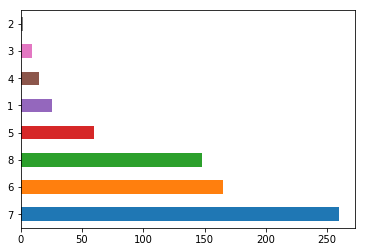

In [8]:
customers['AgeOfVehicle'][(customers['FraudFound_P'] == 1)].value_counts().plot('barh')

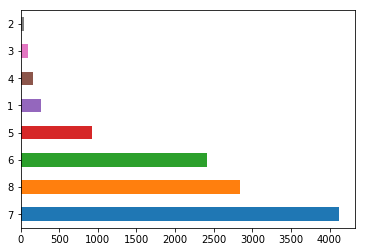

In [9]:
customers['AgeOfVehicle'][(customers['FraudFound_P'] == 0)].value_counts().plot('barh')

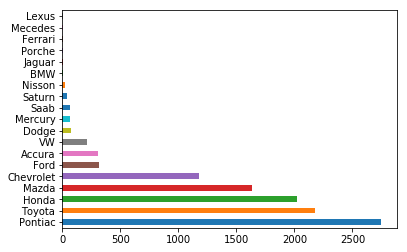

In [10]:
customers['Make'][(customers['FraudFound_P'] == 0)].value_counts().plot('barh')

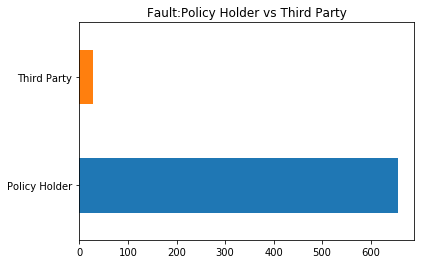

In [41]:
plt.title('Fault:Policy Holder vs Third Party')
customers['Fault'][(customers['FraudFound_P'] == 1)].value_counts().plot('barh')

In [ ]:
We can interpret that Policy Holder changes the fault of accident   
from Third Party to get a insurance claim easily.

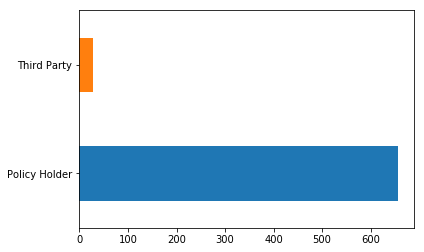

In [39]:
customers['Fault'][(customers['FraudFound_P'] == 1)].value_counts().plot('barh')

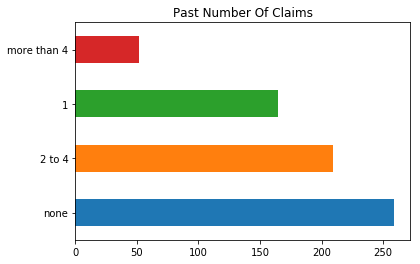

In [49]:
plt.title('Past Number Of Claims')
customers['PastNumberOfClaims'][customers['FraudFound_P']==1].value_counts().plot('barh')

In [21]:
customers[(customers['Make']=='Accura') & (customers['FraudFound_P']==1)].shape

(45, 34)

In [51]:
customers['AgeOfPolicyHolder']

0        26 to 30
1        31 to 35
2        41 to 50
3        51 to 65
4        36 to 40
5        31 to 35
6         over 65
7        41 to 50
8        31 to 35
9        16 to 17
10       51 to 65
11       36 to 40
12       36 to 40
13       31 to 35
14       31 to 35
15       36 to 40
16       41 to 50
17       51 to 65
18       26 to 30
19       16 to 17
20       36 to 40
21       41 to 50
22       36 to 40
23       31 to 35
24       31 to 35
25       31 to 35
26       31 to 35
27       36 to 40
28       36 to 40
29       36 to 40
           ...   
11535    31 to 35
11536    41 to 50
11537    31 to 35
11538    16 to 17
11539    31 to 35
11540    36 to 40
11541    36 to 40
11542    31 to 35
11543    31 to 35
11544    36 to 40
11545    41 to 50
11546    51 to 65
11547     over 65
11548    16 to 17
11549    36 to 40
11550    31 to 35
11551    36 to 40
11552    31 to 35
11553    41 to 50
11554    31 to 35
11555    31 to 35
11556    51 to 65
11557    51 to 65
11558    31 to 35
11559    3

In [47]:
customers['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64